In [3]:
import pandas as pd

In [113]:
df = pd.read_csv('../input/csv_for_rdf/automatic_EN_filtered.csv')
enriched_df = pd.read_csv('../input/csv_for_wn_alignment/automatic_en_filtered_aligned_to_wordnet.csv', sep=";")

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20578 entries, 0 to 20577
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   wn_synset                1546 non-null   object 
 1   bn:id                    20578 non-null  object 
 2   pos                      1546 non-null   object 
 3   lemmata EN               20534 non-null  object 
 4   definition               20576 non-null  object 
 5   is it related to music?  20578 non-null  object 
 6   note                     2 non-null      object 
 7   removed EN               0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 1.3+ MB


In [114]:
enriched_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20576 entries, 0 to 20575
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lemmata EN   20532 non-null  object 
 1   bn:id        20576 non-null  object 
 2   wn_synset    20576 non-null  object 
 3   Column4      20576 non-null  object 
 4   description  19918 non-null  object 
 5   confidence   19918 non-null  float64
dtypes: float64(1), object(5)
memory usage: 964.6+ KB


In [116]:
# how many rows are originally missing wn synsets?
df['wn_synset'].isna().sum()

19032

In [117]:
# How many rows are missing wn synsets after alignment?
enriched_df['wn_synset'].isna().sum()

0

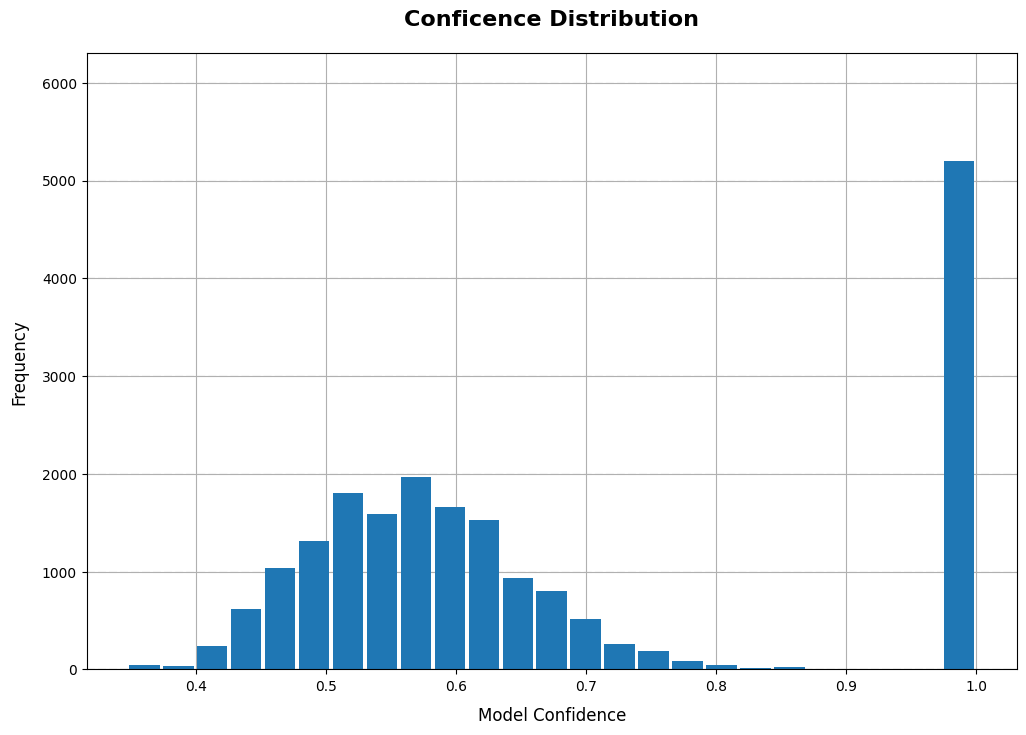

In [118]:
ax = enriched_df.hist(column='confidence', bins=25, grid=True, figsize=(12,8), zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    x.set_title("Conficence Distribution", weight='bold', pad=20, size=16)
    x.set_xlabel("Model Confidence", labelpad=10,  size=12)
    x.set_ylabel("Frequency", labelpad=10,  size=12)


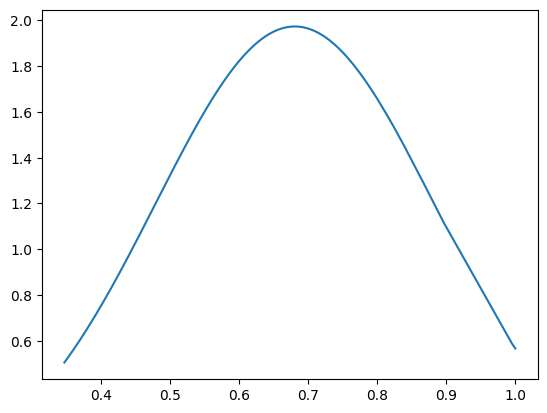

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calculating mean and Stdev of AGW
df_mean = np.mean(enriched_df["confidence"])
df_std = np.std(enriched_df["confidence"])
 
print("Mean of the dataset is",df_mean)
print("Standard deviation of the dataset is",df_std)
# Calculating probability density function (PDF)
plt.plot(enriched_df["confidence"].sort_values(), norm.pdf(enriched_df["confidence"].sort_values(), df_mean, df_std))
plt.show()

In [119]:
enriched_df['confidence'].describe()

count    19918.000000
mean         0.680552
std          0.202124
min          0.346792
25%          0.528804
50%          0.601042
75%          1.000000
max          1.000000
Name: confidence, dtype: float64

In [120]:
print(enriched_df[enriched_df['confidence'] >= 0.9].count())
enriched_df[enriched_df['confidence'] >= 0.9].count().divide(enriched_df["confidence"].count())

lemmata EN     5202
bn:id          5202
wn_synset      5202
Column4        5202
description    5202
confidence     5202
dtype: int64


lemmata EN     0.261171
bn:id          0.261171
wn_synset      0.261171
Column4        0.261171
description    0.261171
confidence     0.261171
dtype: float64

In [122]:
# Fill empty values in 'wn_synset' column of df with values from enriched_df
df['wn_synset'] = df['wn_synset'].mask(df['wn_synset'].isna(), enriched_df['wn_synset'])

In [123]:
# how many values are still missing?
df['wn_synset'].isna().sum()

0

In [124]:
df.to_csv('../input/csv_for_rdf/automatic_EN_filtered.csv', index=False)